In [1]:
from Univariate import Univariate

In [3]:
import pandas as pd
import numpy as np

In [5]:
dataset=pd.read_csv("Preplacement.csv")
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,265000.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [7]:
dataset.isnull().sum()

ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_13108\2759213736.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

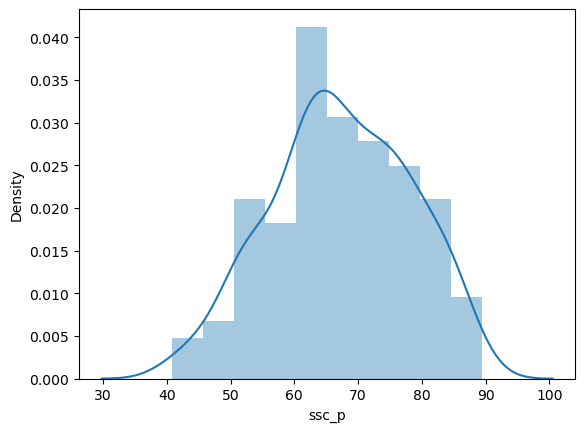

In [9]:
# Distribution plot use distplot
import seaborn as sns
sns.distplot(dataset["ssc_p"])

In [10]:
def get_pdf_probabiliy(dataset,startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    # sns.distplot(dataset, kde = True, color="Yellow",kde_kws={"color": "blue"})
    ax=sns.histplot(dataset, kde=True,stat="density",color="Green", kde_kws=dict(cut=3))
    
    # kde- KERNEL DENSITY
    # kde_kws - density color
    # histogram color  is yellow

    pyplot.axvline(startrange,color="Red")  # v mean vertical line
    pyplot.axvline(endrange,color="Red")
    # Generate Sample
    sample = dataset
    # Calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean=%.3f,Standard Deviation = %.3f" % (sample_mean,sample_std))
    # DEfine the Disribution
    dist= norm(sample_mean,sample_std)  # learn normal distribution pattern
    # print("dist : ",dist)
    
    # smple probabilities or a range of outcomes
    values =[value for value in range(startrange,endrange)] # stoe value in list
    probabilties = [dist.pdf(value) for value in values] # each value give to dist paten and sum the values pdf -probabiliy densiy funcion
    print("Print each Dist vale : ", probabilties)
    prob=sum(probabilties)
    print("The area between range({},{}):{}".format(startrange,endrange,prob))
    return prob
    


Mean=67.303,Standard Deviation = 10.827
Print each Dist vale :  [0.029348806868826963, 0.031102471650606527, 0.03268094966902733, 0.034047854157679046, 0.03517062909285573]
The area between range(60,65):0.1623507114389956


0.1623507114389956

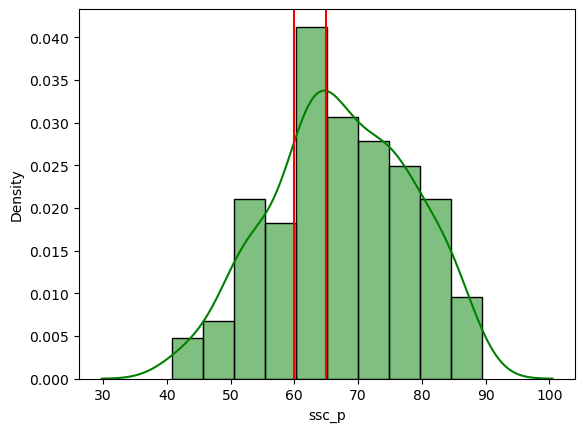

In [11]:
get_pdf_probabiliy(dataset["ssc_p"],60,65)

In [12]:
# Cumulaive Densiy funcion
from statsmodels.distributions.empirical_distribution import ECDF
#from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["ssc_p"])
ecdf(59)

0.22325581395348837

In [13]:
#!pip install statsmodels

# Standrd Normal Distributiom

In [15]:
def stdNormDistGraph(dataset):
        # convert to standard Normal Disribution
    import seaborn as sns
    mean = dataset.mean()
    std = dataset.std()
    values = [n for n in dataset]
    z_score=[((i-mean)/std) for i in values]
    sns.histplot(z_score,kde=True)
    print("sum : %3f " %(sum(z_score)))
    print(len(z_score))
    print(sum(z_score)/len(z_score))
    return z_score
    
    

sum : -0.000000 
215
-4.2911410858767677e-16


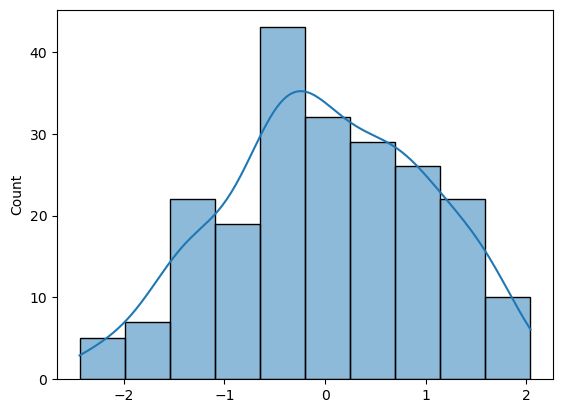

In [16]:
zscore=stdNormDistGraph(dataset["ssc_p"])

In [17]:
df=pd.DataFrame(zscore)

a=list(df[0])
print("sum : %3f" %(sum(a)))
m=df.mean()
s=df.std()
print("mean : ", m,"std : ",s) 

sum : -0.000000
mean :  0   -3.759267e-16
dtype: float64 std :  0    1.0
dtype: float64
